In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import zipfile
import collections

In [2]:
# Task 1
zipfile.ZipFile('weather.zip').extractall('.')

In [3]:
ls weather

 Volume in drive C is Acer
 Volume Serial Number is 489A-D9CF

 Directory of C:\Users\hassi\Projects\Project 2\weather

06/26/2023  06:02 AM    <DIR>          .
06/27/2023  07:04 PM    <DIR>          ..
06/26/2023  06:02 AM    <DIR>          .ipynb_checkpoints
06/27/2023  07:05 PM            44,303 project2.ipynb
06/27/2023  07:05 PM            24,088 readme.txt
06/27/2023  07:05 PM         1,711,530 RSM00030710.dly
06/27/2023  07:05 PM         8,523,546 stations.txt
06/27/2023  07:05 PM         4,165,020 USW00014922.dly
06/27/2023  07:05 PM         3,692,790 USW00022536.dly
06/27/2023  07:05 PM         3,502,710 USW00023188.dly
06/27/2023  07:05 PM               576 weather.README
               8 File(s)     21,664,563 bytes
               3 Dir(s)  727,680,745,472 bytes free


In [4]:
cd weather

C:\Users\hassi\Projects\Project 2\weather


In [5]:
%matplotlib inline

In [6]:
open('stations.txt','r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [7]:
open('readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [8]:
def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [9]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [10]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [11]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    data['value'][data['value'] == -999.9] = np.nan
    return data

In [12]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    nan = np.isnan(data['value'])
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [13]:
filename = 'USW00014922.dly'
obs = 'TMAX'

tmax_series = getobs(filename, obs)
fillnans(tmax_series)

In [14]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [15]:
# Task 2 Part a
years = range(1940, 2015)
minneapolis_mean = np.zeros(len(years))

for i, year in enumerate(years):
    selected_data = selectyear(tmax_series, year)
    minneapolis_mean[i] = np.mean(selected_data)

In [16]:
# Mean of the TMAX Series
minneapolis_mean

array([11.8068306 , 13.82547945, 12.75561644, 11.87452055, 13.08169399,
       11.6430137 , 13.43260274, 12.54328767, 13.31857923, 13.54219178,
       10.8569863 , 10.44876712, 12.75846995, 13.64356164, 12.78493151,
       12.96191781, 12.62131148, 12.49863014, 13.10438356, 12.94986301,
       12.15218579, 12.48767123, 11.22136986, 12.85616438, 13.2715847 ,
       11.0890411 , 11.89205479, 11.47780822, 12.54699454, 12.27178082,
       12.07945205, 12.01835616, 10.24453552, 13.11643836, 12.26849315,
       12.26465753, 13.80546448, 12.65945205, 12.21123288, 11.47726027,
       12.84562842, 13.33589041, 12.05726027, 12.1709589 , 12.2204918 ,
       11.75835616, 12.51917808, 15.14986301, 13.79180328, 12.12493151,
       14.04356164, 12.83013699, 12.20355191, 11.29589041, 12.78767123,
       12.55753425, 11.11420765, 12.08328767, 14.54383562, 14.02438356,
       12.84644809, 13.54109589, 12.88109589, 12.93671233, 12.83415301,
       13.77972603, 14.43068493, 13.70465753, 12.04535519, 12.33

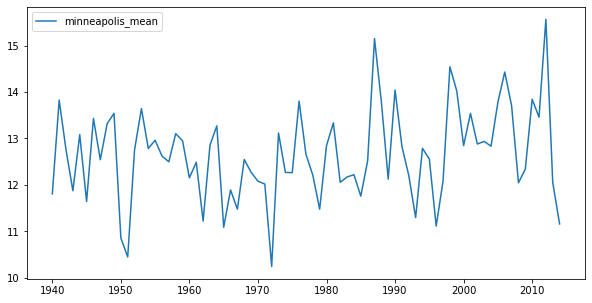

In [17]:
# Plotting the above Mean data
pp.figure(figsize=(10,5))
pp.plot(years, minneapolis_mean, label="minneapolis_mean")
pp.legend(loc="upper left")
pp.show()

In [18]:
# Task 2 Part b
minneapolis_warmest_index = np.argmax(minneapolis_mean)
minneapolis_warmest = years[minneapolis_warmest_index]

In [19]:
minneapolis_warmest

2012

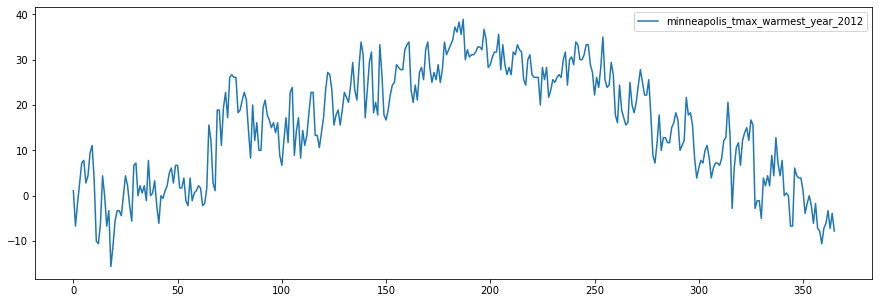

In [20]:
# Task 2 Part c
pp.figure(figsize=(15,5))
minneapolis_warmest_year = selectyear(tmax_series, minneapolis_warmest)
pp.plot(minneapolis_warmest_year, label="minneapolis_tmax_warmest_year_2012")
pp.legend(loc="upper right")
pp.show()

In [21]:
# Task 3 Part a
filename = 'USW00023188.dly'
obs = 'TMIN'

tmin_series = getobs(filename, obs)
fillnans(tmin_series)

years = range(1940, 2015)
sandiego_mean = np.zeros(len(years))

for i, year in enumerate(years):
    selected_data = selectyear(tmin_series, year)
    sandiego_mean[i] = np.mean(selected_data)

In [22]:
# Mean of the TMAX Series
sandiego_mean

array([13.36120219, 13.33753425, 12.46356164, 12.86931507, 12.0363388 ,
       12.68109589, 12.81534247, 12.64493151, 11.65327869, 12.16657534,
       12.72684932, 12.90739726, 12.75191257, 12.87671233, 13.33068493,
       12.90712329, 13.00819672, 14.01452055, 14.33506849, 14.75068493,
       13.2431694 , 13.30767123, 12.72273973, 13.15342466, 12.53032787,
       12.93726027, 13.53287671, 13.4709589 , 13.94562842, 14.03945205,
       14.17616438, 13.37232877, 13.90218579, 13.83589041, 13.95452055,
       13.20986301, 15.01038251, 15.11479452, 15.6539726 , 15.02931507,
       15.28661202, 16.17452055, 14.92410959, 16.23315068, 16.36967213,
       14.59561644, 14.14      , 13.8109589 , 13.85546448, 13.80273973,
       13.98465753, 13.5169863 , 14.86202186, 14.23671233, 13.69643836,
       14.31835616, 14.83770492, 15.1230137 , 14.13123288, 13.40273973,
       14.41693989, 13.93890411, 13.73917808, 14.53835616, 15.07786885,
       14.73643836, 14.76273973, 13.99506849, 14.14344262, 14.42

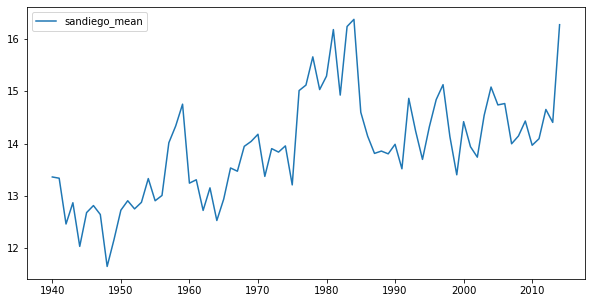

In [23]:
# Plotting the above Mean data
pp.figure(figsize=(10,5))
pp.plot(years, sandiego_mean, label="sandiego_mean")
pp.legend(loc="upper left")
pp.show()

In [24]:
# Task 3 Part b
sandiego_coldest_index = np.argmin(sandiego_mean)
sandiego_coldest = years[sandiego_coldest_index]

In [25]:
sandiego_coldest

1948

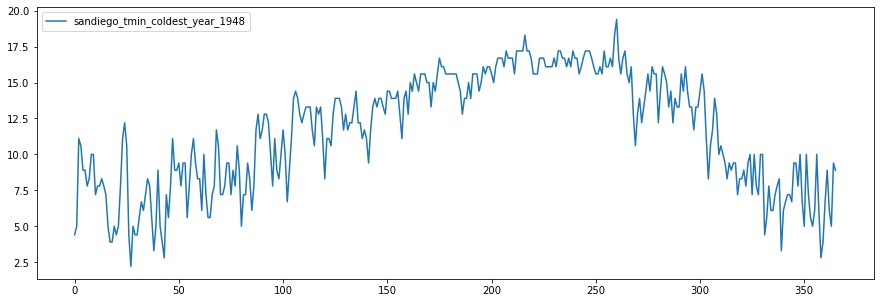

In [26]:
# Task 3 Part c
sandiego_coldest_year = selectyear(tmin_series, sandiego_coldest)
pp.figure(figsize=(15,5))
pp.plot(sandiego_coldest_year, label="sandiego_tmin_coldest_year_1948")
pp.legend(loc="upper left")
pp.show()

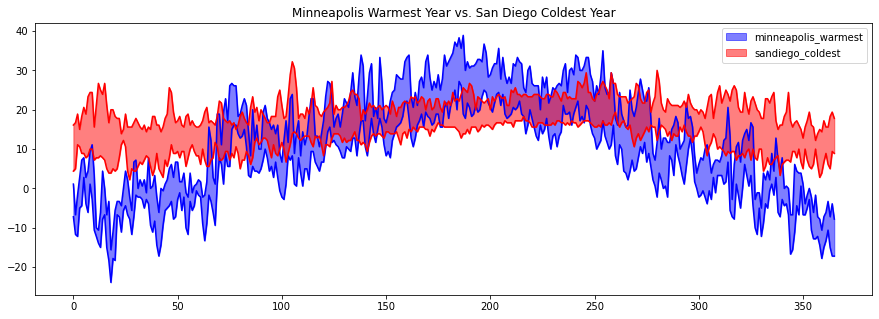

In [27]:
# Task 4

# Retrieve the temperature data for the warmest year in Minneapolis
minneapolis_tmin = getobs('USW00014922.dly', 'TMIN')
fillnans(minneapolis_tmin)
minneapolis_warmest_tmin_data = selectyear(minneapolis_tmin, minneapolis_warmest)

# Retrieve the temperature data for the coldest year in San Diego
sandiego_tmax = getobs('USW00023188.dly', 'TMAX')
fillnans(sandiego_tmax)
sandiego_coldest_tmax_data = selectyear(sandiego_tmax, sandiego_coldest)

# Plotting the TMAX and TMIN series for Minneapolis and San Diego
pp.figure( figsize=(15,5))
pp.plot(minneapolis_warmest_year, color='blue')
pp.plot(minneapolis_warmest_tmin_data, color='blue')
pp.plot(sandiego_coldest_tmax_data, color='red')
pp.plot(sandiego_coldest_year, color='red')

# Filling the area between the TMAX and TMIN series
pp.fill_between(range(len(minneapolis_warmest_year)), minneapolis_warmest_year, minneapolis_warmest_tmin_data, color='blue', label="minneapolis_warmest", alpha=0.5)
pp.fill_between(range(len(sandiego_coldest_year)), sandiego_coldest_year, sandiego_coldest_tmax_data, color='red', label="sandiego_coldest", alpha=0.5)

pp.title('Minneapolis Warmest Year vs. San Diego Coldest Year')
pp.legend(loc="upper right")
pp.show()